<Importing DEPENDENCIES>

<h1> Importing Dependencies

In [1]:
import numpy as np
import os
from keras.models import Sequential, Model
from keras.layers import Dense, Input, merge
from keras.layers import Reshape,LeakyReLU,ZeroPadding2D
from keras.layers.core import Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D \
                                            ,Deconvolution2D
from keras.layers.core import Flatten
from keras.layers import Input, merge, Convolution2D, MaxPooling2D \
,UpSampling2D
from keras.optimizers import SGD, Adagrad
from PIL import Image
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.objectives import binary_crossentropy
import tensorflow as tf
#from tqdm import tqdm
import scipy.misc as im
K.set_image_dim_ordering('tf') 
IN_CH = 3
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Dropout,\
Flatten, Dense
from keras.layers.merge import Concatenate
from keras.layers.convolutional import Conv2D \
,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import plot_model
import numpy as np
import glob, pickle
import os, sys
import argparse
#import cv2
from keras.models import Sequential, Model
from keras.layers import Dense, Input, merge
from keras.layers import Reshape
from keras.layers.core import Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D \
, Deconvolution2D
from keras.layers.core import Flatten
from keras.layers import Input, merge, Convolution2D, MaxPooling2D \
, UpSampling2D
from keras.optimizers import SGD, Adagrad
from PIL import Image
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import math
K.set_image_dim_ordering('tf') 

img_rows = 256
img_cols = 256
SHAPE = 256
BATCH = 4
IN_CH = 3
OUT_CH = 3
LAMBDA = 100
NF = 64 # number of filter
BATCH_SIZE = 10
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



Using TensorFlow backend.


<h1>Helper Functions for getting all the images and splitting 

In [2]:
# head
def split_input(img,mode='AtoB'):
    """
    img: an 512x256x3 image
    :return: [input, output]
    """
    input, output = img[:,:img_cols,:], img[:,img_cols:,:]

    if mode == 'BtoA':
        input, output = output, input
    return [input, output]

def get_data(datadir):
    #datadir = args.data
    # assume each image is 512x256 split to left and right
    imgs = glob.glob(os.path.join(datadir, '*.jpg'))
    data_X = np.zeros((len(imgs),img_rows,img_cols,3))
    data_Y = np.zeros((len(imgs),img_rows,img_cols,3))
    i = 0
    for file in imgs:
        #img = cv2.imread(file,cv2.IMREAD_COLOR)
        img=Image.open(file)
        img = img.resize((img_cols*2, img_rows), Image.LANCZOS)
        
        img = np.array(img)
        
        

        X, Y = split_input(img)

        data_X[i,:,:,:] = X
        data_Y[i,:,:,:] = Y
        i = i+1
    return data_X, data_Y

<h4>Finally getting the input_image and expected_image image into data_x and data_y respectively

In [3]:
data_x,data_y=get_data('test')


<h1> Defining the generator model 

In [4]:
def generator_model():
    
    input_tensor = Input(shape=(img_rows,img_cols,IN_CH)) # type: Input
    output_ch = 3
    filters=128
    x =                       Conv2D(filters*1, kernel_size=(4, 4), strides=(2, 2), padding="same")( input_tensor )       ; e1 = x
    x = BatchNormalization()( Conv2D(filters*2, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) ) ); e2 = x
    x = BatchNormalization()( Conv2D(filters*4, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) ) ); e3 = x
    x = BatchNormalization()( Conv2D(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) ) ); e4 = x
    x = BatchNormalization()( Conv2D(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) ) ); e5 = x
    x = BatchNormalization()( Conv2D(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) ) ); e6 = x
    x = BatchNormalization()( Conv2D(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) ) ); e7 = x
    x =                       Conv2D(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( LeakyReLU(0.2)(x) )  ; e8 = x
    # dec
    x = BatchNormalization()( Conv2DTranspose(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([Dropout(0.5)(x), e7])
    x = BatchNormalization()( Conv2DTranspose(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([Dropout(0.5)(x), e6])
    x = BatchNormalization()( Conv2DTranspose(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([Dropout(0.5)(x), e5])
    x = BatchNormalization()( Conv2DTranspose(filters*8, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([x, e4])
    x = BatchNormalization()( Conv2DTranspose(filters*4, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([x, e3])
    x = BatchNormalization()( Conv2DTranspose(filters*2, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([x, e2])
    x = BatchNormalization()( Conv2DTranspose(filters*1, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) ) ); x = Concatenate()([x, e1])
    x =                       Conv2DTranspose(output_ch, kernel_size=(4, 4), strides=(2, 2), padding="same")( Activation("relu")(x) )
    
    x = Activation("tanh")(x)
    
    unet = Model(inputs=input_tensor, outputs=x)
    
    return unet

<h1> Loading the generator model and examining details of every layer 

In [5]:
gx=generator_model()
gx.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     6272      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 256)       1024      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 512)       2097664   
__________

<h1> Loading the weights from a file saved in directory 
<h2> This was the file  that was stored after the training was completed. 


In [6]:
gx.load_weights('generator')

<h1> Examining test set one by one 

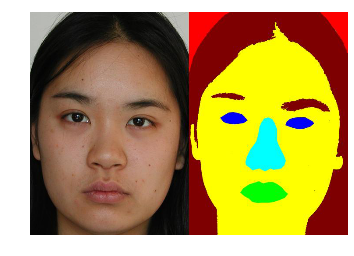

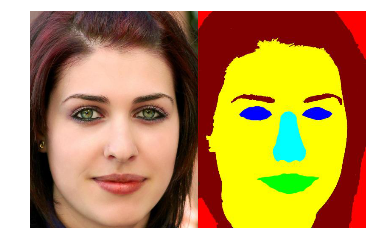

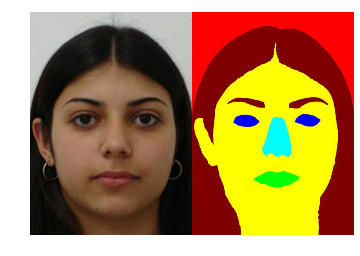

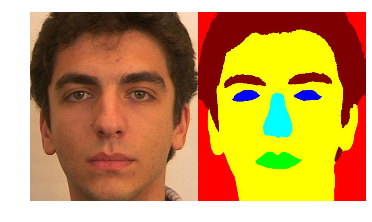

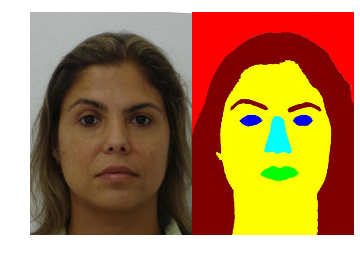

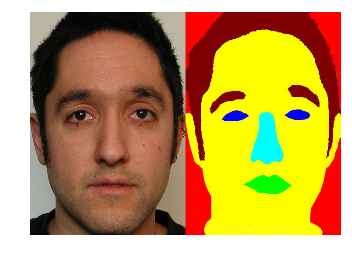

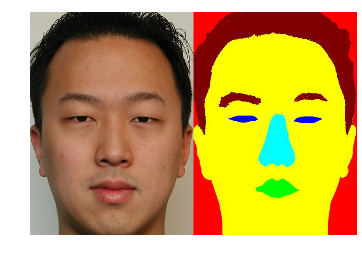

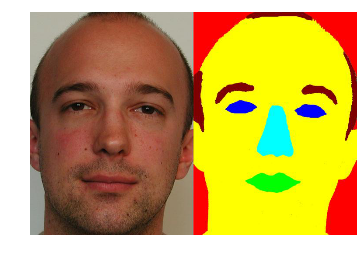

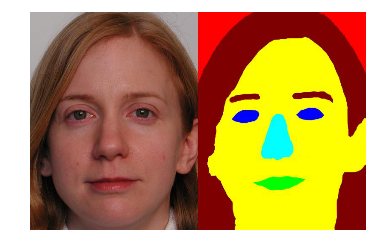

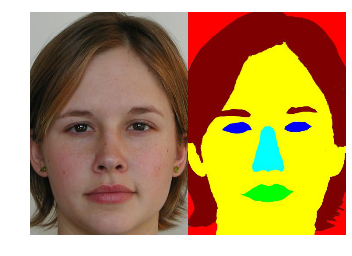

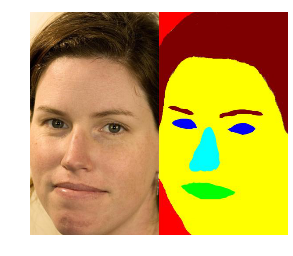

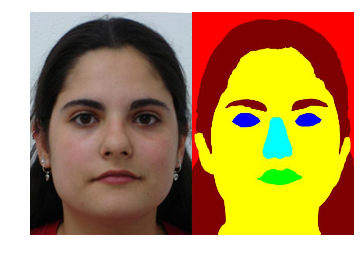

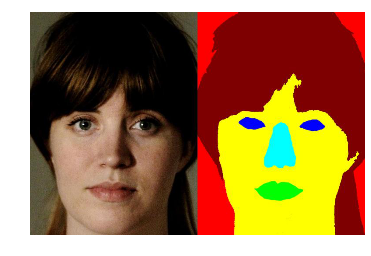

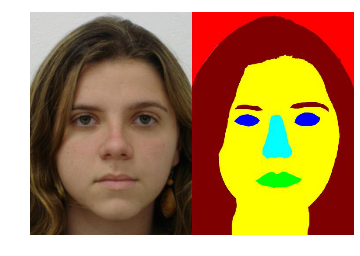

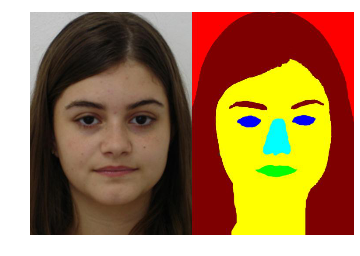

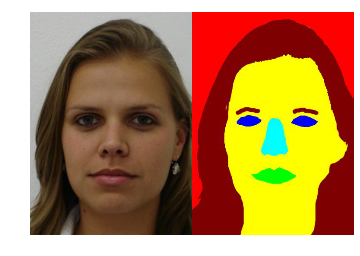

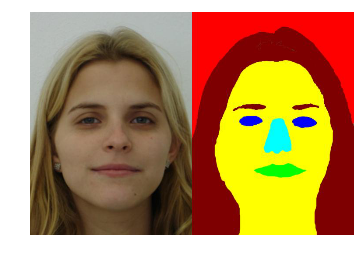

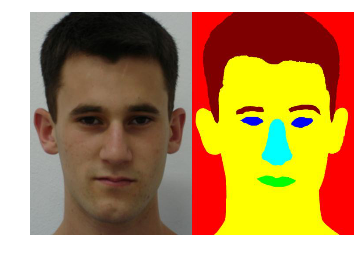

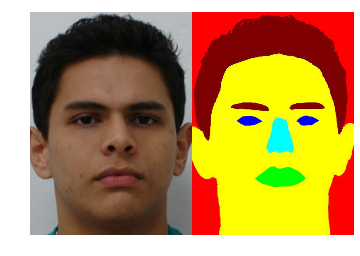

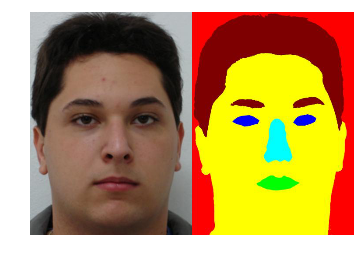

In [15]:
from IPython.display import display, Image

#from glob import glob
import PIL
images = [ PIL.Image.open(f) for f in glob('test/*') ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

np_images = [ img2array(im) for im in images ]
for img in np_images:
    plt.figure()
    plt.axis('off')
    plt.imshow(img)

<h1> Code that generates output for a particular test sample 

In [7]:
def generate(n,generator,data_x):
    
    target=data_x[n-1:n]
    #nama='input'+str(n)+'.png'
    #target = mpimg.imread(nama)
    target = target.astype('float32')
    target=(target-127.5)/127.5
    pic = generator.predict(target)
    #pic=pic*127.5+127.5
    pic = np.squeeze(pic,axis=0)
    
    
    nama='input'+str(n)+'.png'
    image1 = mpimg.imread(nama)
    
    nama2='pic'+str(n)+'.png'
    image2 = mpimg.imread(nama2)
    
    image3=pic
    fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False)
    ax[0].imshow(image1)
    ax[0].autoscale(False)
    ax[0].set_axis_off()
    ax[0].set_title('Input')

    ax[1].imshow(image2)
    ax[1].autoscale(False)
    ax[1].set_axis_off()
    ax[1].set_title('Expected')
    
    ax[2].imshow(image3)
    ax[2].autoscale(False)
    ax[2].set_axis_off()
    ax[2].set_title('Generated')

<h1> Testing the above Function

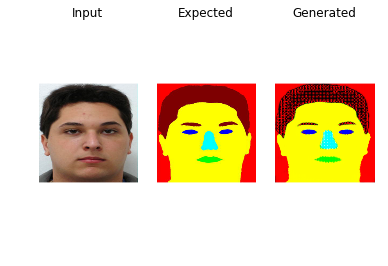

In [8]:
 generate(20,gx,data_x)

<h1> Generating output for all test samples.

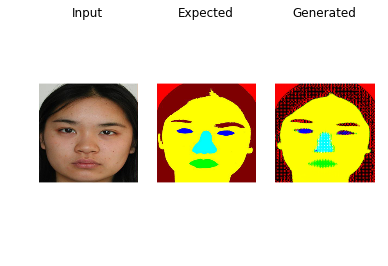

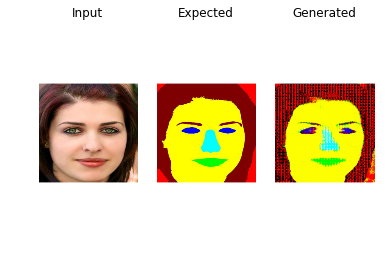

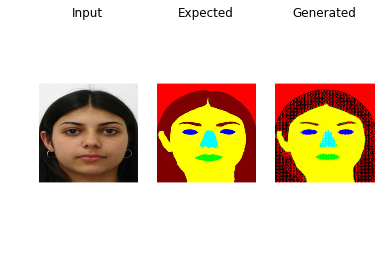

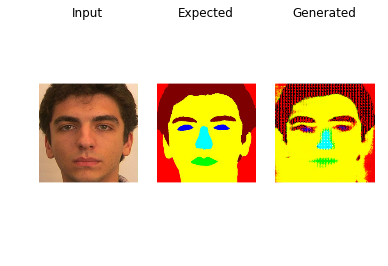

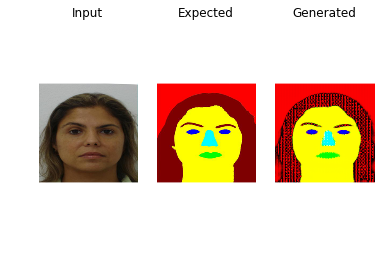

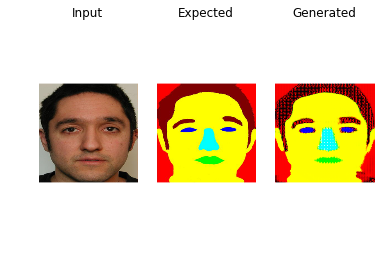

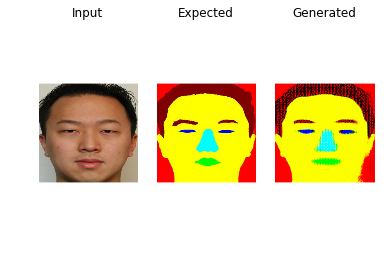

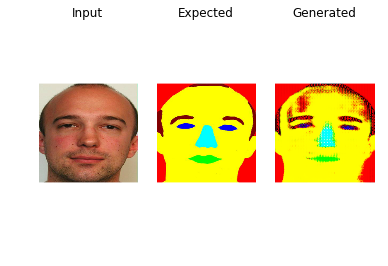

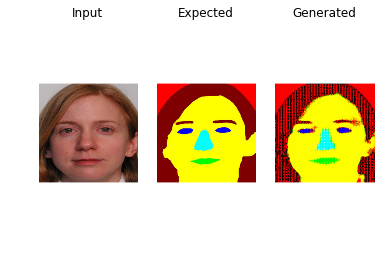

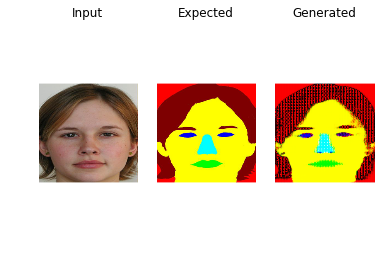

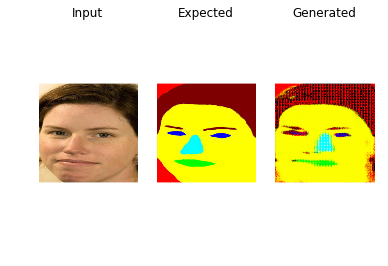

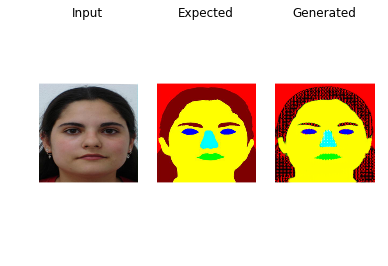

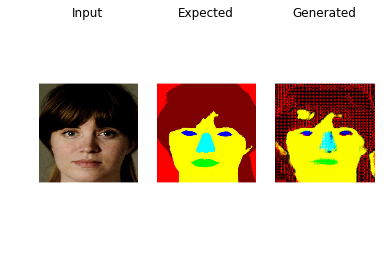

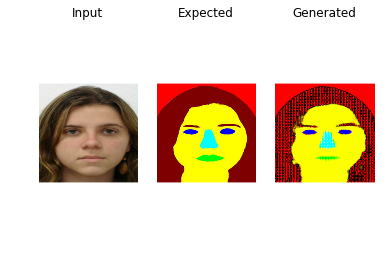

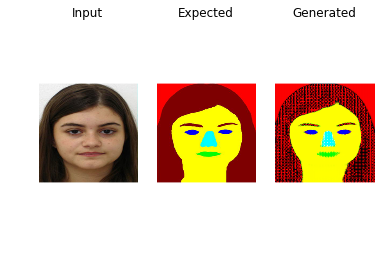

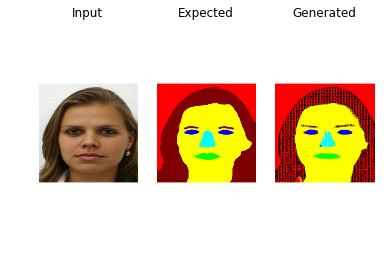

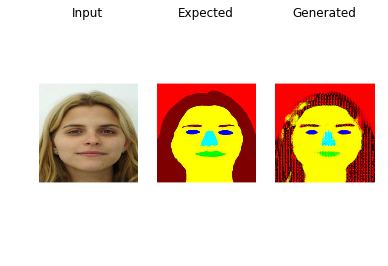

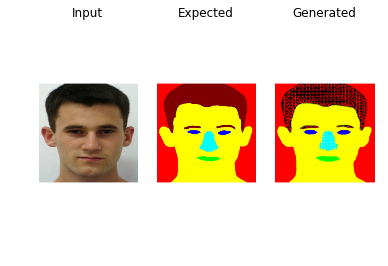

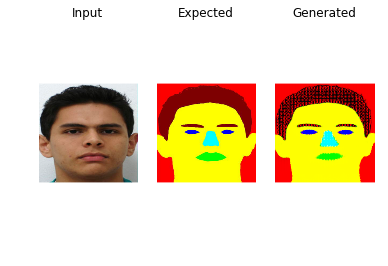

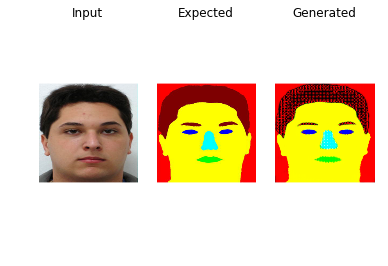

In [9]:
for i in range(1,21,1):
    generate(i,gx,data_x)